In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('ASIANPAINT.csv', date_parser = True)
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458
5305,2021-04-30,ASIANPAINT,EQ,2613.45,2595.0,2605.80,2524.05,2529.0,2536.40,2558.66,1384907,3.543512e+14,91934.0,750496.0,0.5419


In [5]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [6]:
data_training = data_training.drop(['Date','Prev Close','Last','Symbol','Series','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'], axis = 1)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.03192912, 0.03462838, 0.03356214, 0.03416394, 0.00039805],
       [0.03392469, 0.03502583, 0.03457304, 0.03494358, 0.00057937],
       [0.03222845, 0.03462838, 0.03386541, 0.03443382, 0.00031464],
       ...,
       [0.22950051, 0.2323132 , 0.23256942, 0.23224085, 0.26279596],
       [0.23408034, 0.23196542, 0.23351968, 0.23094146, 0.20609743],
       [0.23248389, 0.23097178, 0.23519778, 0.2323508 , 0.08444129]])

In [8]:
data_training[0:10]

array([[0.03192912, 0.03462838, 0.03356214, 0.03416394, 0.00039805],
       [0.03392469, 0.03502583, 0.03457304, 0.03494358, 0.00057937],
       [0.03222845, 0.03462838, 0.03386541, 0.03443382, 0.00031464],
       [0.03490252, 0.03361486, 0.03447195, 0.03333433, 0.0004024 ],
       [0.03312646, 0.03462838, 0.03356214, 0.03497356, 0.00115607],
       [0.04090918, 0.03991455, 0.04144722, 0.04083081, 0.00728747],
       [0.04090918, 0.04118641, 0.04144722, 0.04087079, 0.00792293],
       [0.04190697, 0.04624404, 0.04165951, 0.04136056, 0.00300127],
       [0.04250564, 0.04255763, 0.04226605, 0.04157046, 0.00110531],
       [0.0399114 , 0.03957671, 0.04124503, 0.03983128, 0.00780604]])

In [9]:
X_train = []
y_train = []

In [10]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(4669, 60, 5)

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [16]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [18]:
regressior.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
146/146 [==============================] - 29s 158ms/step - loss: 0.0074
Epoch 2/50
146/146 [==============================] - 26s 178ms/step - loss: 0.0033
Epoch 3/50
146/146 [==============================] - 25s 175ms/step - loss: 0.0077
Epoch 4/50
146/146 [==============================] - 28s 194ms/step - loss: 0.0026
Epoch 5/50
146/146 [==============================] - 29s 200ms/step - loss: 0.0025
Epoch 6/50
146/146 [==============================] - 31s 213ms/step - loss: 0.0022
Epoch 7/50
146/146 [==============================] - 28s 192ms/step - loss: 0.0021
Epoch 8/50
146/146 [==============================] - 29s 196ms/step - loss: 0.0021
Epoch 9/50
146/146 [==============================] - 29s 199ms/step - loss: 0.0018
Epoch 10/50
146/146 [==============================] - 29s 198ms/step - loss: 0.0018
Epoch 11/50
146/146 [==============================] - 27s 185ms/step - loss: 0.0016
Epoch 12/50
146/146 [==============================] - 28s 190ms/step - lo

In [19]:
data_test.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4729,2019-01-01,ASIANPAINT,EQ,1373.05,1373.2,1379.70,1358.60,1368.00,1371.55,1368.68,664707,9.097708e+13,17230.0,352333.0,0.5301
4730,2019-01-02,ASIANPAINT,EQ,1371.55,1367.0,1386.85,1361.60,1380.05,1383.30,1376.38,1233780,1.698145e+14,42748.0,639065.0,0.5180
4731,2019-01-03,ASIANPAINT,EQ,1383.30,1381.8,1393.85,1378.00,1387.00,1388.30,1388.80,1636293,2.272490e+14,87120.0,911907.0,0.5573
4732,2019-01-04,ASIANPAINT,EQ,1388.30,1388.0,1401.40,1381.40,1383.00,1385.85,1393.55,1202397,1.675602e+14,58130.0,578860.0,0.4814
4733,2019-01-07,ASIANPAINT,EQ,1385.85,1386.0,1405.40,1383.75,1395.60,1396.00,1396.46,1074373,1.500315e+14,43071.0,679696.0,0.6326


In [20]:
data_test.tail(60)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5246,2021-02-01,ASIANPAINT,EQ,2407.35,2426.60,2467.75,2376.90,2466.80,2447.80,2415.26,1797359,4.341089e+14,113027.0,550822.0,0.3065
5247,2021-02-02,ASIANPAINT,EQ,2447.80,2460.00,2520.00,2425.10,2470.00,2463.65,2469.98,2679428,6.618128e+14,144259.0,811972.0,0.3030
5248,2021-02-03,ASIANPAINT,EQ,2463.65,2503.85,2503.85,2438.35,2454.00,2453.65,2464.64,2409356,5.938196e+14,102463.0,999862.0,0.4150
5249,2021-02-04,ASIANPAINT,EQ,2453.65,2456.00,2456.00,2398.00,2406.00,2401.80,2411.35,3478562,8.388020e+14,160854.0,2051905.0,0.5899
5250,2021-02-05,ASIANPAINT,EQ,2401.80,2420.00,2423.90,2370.80,2382.00,2376.75,2386.95,3303319,7.884849e+14,149221.0,1640282.0,0.4966
5251,2021-02-08,ASIANPAINT,EQ,2376.75,2394.00,2434.90,2373.40,2424.00,2416.85,2408.69,3666313,8.830997e+14,162331.0,1887081.0,0.5147
5252,2021-02-09,ASIANPAINT,EQ,2416.85,2432.50,2532.45,2423.65,2508.00,2506.85,2498.10,7178572,1.793281e+15,273637.0,2117184.0,0.2949
5253,2021-02-10,ASIANPAINT,EQ,2506.85,2529.00,2555.00,2475.00,2510.15,2510.60,2510.74,4473123,1.123085e+15,194967.0,1426820.0,0.3190
5254,2021-02-11,ASIANPAINT,EQ,2510.60,2524.95,2540.00,2495.10,2508.00,2505.50,2511.73,1446286,3.632678e+14,75891.0,421197.0,0.2912
5255,2021-02-12,ASIANPAINT,EQ,2505.50,2518.00,2523.00,2464.20,2488.00,2486.10,2491.77,1376085,3.428889e+14,61470.0,304801.0,0.2215


In [21]:
past_60_days = data_test.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date','Prev Close','Last','Symbol','Series','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2426.60,2467.75,2376.90,2447.80,1797359
1,2460.00,2520.00,2425.10,2463.65,2679428
2,2503.85,2503.85,2438.35,2453.65,2409356
3,2456.00,2456.00,2398.00,2401.80,3478562
4,2420.00,2423.90,2370.80,2376.75,3303319


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.44233801, 0.44753577, 0.43932027, 0.44719982, 0.21725759],
       [0.44900321, 0.45791932, 0.44906542, 0.45036833, 0.32388005],
       [0.45775379, 0.45470986, 0.45174432, 0.44836927, 0.29123437],
       ...,
       [0.47454651, 0.47784181, 0.47937243, 0.48053415, 0.12879953],
       [0.4829279 , 0.48216415, 0.47836152, 0.48031425, 0.15657541],
       [0.47594341, 0.47497019, 0.46907128, 0.46491149, 0.16740134]])

In [24]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((577, 60, 5), (577,))

In [27]:
y_pred = regressior.predict(X_test)

19/19 [==============================] - 1s 53ms/step


In [28]:
scaler.scale_

array([1.99556983e-04, 1.98728140e-04, 2.02181539e-04, 1.99906044e-04,
       1.20877693e-07])

In [29]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [30]:
y_pred = y_pred*scale
y_test = y_test*scale

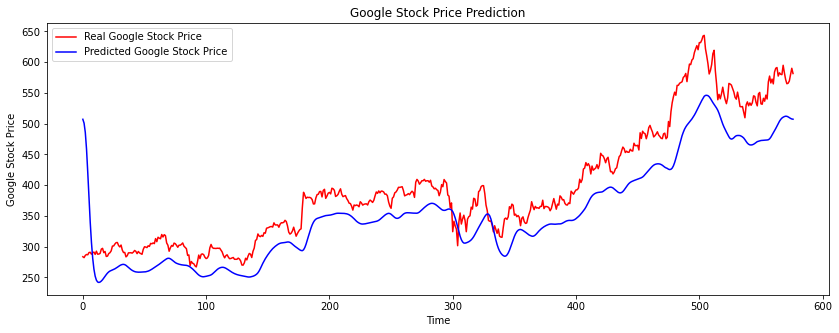

In [37]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [31]:
def graph(y_test,y_pred):

    plt.figure(figsize=(14,5))
    plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
    plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

In [34]:

from tkinter import * 
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)

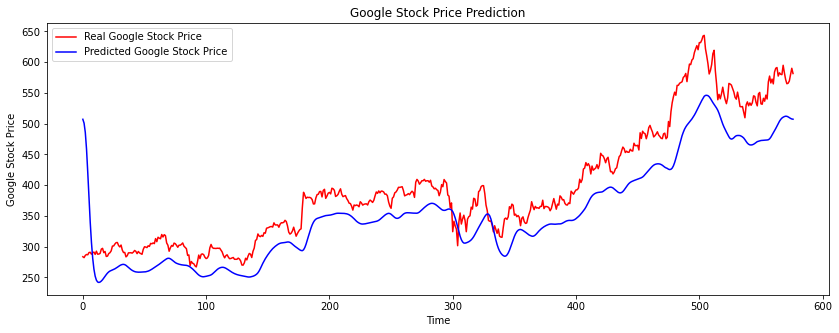

In [43]:
plot2=graph(y_test,y_pred)

In [48]:
'''def plot():
  
    # the figure that will contain the plot
    fig = Figure(figsize = (5, 5),
                 dpi = 100)
  
    # list of squares
    y = [i**2 for i in range(101)]
  
    # adding the subplot
    plot1 = fig.add_subplot(111)
  
    # plotting the graph
    plot1.plot(y)
  
    # creating the Tkinter canvas
    # containing the Matplotlib figure
    canvas = FigureCanvasTkAgg(fig,
                               master = window)  
    canvas.draw()
  
    # placing the canvas on the Tkinter window
    canvas.get_tk_widget().pack()
  
    # creating the Matplotlib toolbar
    toolbar = NavigationToolbar2Tk(canvas,
                                   window)
    toolbar.update()
  
    # placing the toolbar on the Tkinter window
    canvas.get_tk_widget().pack()'''
  
# the main Tkinter window
window = Tk()
  
# setting the title 
window.title('Plotting in Tkinter')
  
# dimensions of the main window
window.geometry("500x500")
  
# button that displays the plot
plot_button = Button(master = window, 
                     command = plot2,
                     height = 2, 
                     width = 10,
                     text = "Plot")
  
# place the button 
# in main window
plot_button.pack()
  
# run the gui
window.mainloop()